In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_images_from_folder(folder, num_images=None):
    images = [] # list to store images
    if num_images is not None: # if num_images is not None, randomly select num_images images.
        indices = np.random.permutation(len(os.listdir(folder)))[:num_images]
    else: # if num_images is None, load all images randomly.
        indices = np.random.permutation(len(os.listdir(folder)))
    filenames = np.array(os.listdir(folder))[indices] # get all files in the folder
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [62]:
normal_cases = load_images_from_folder("./Chest CT-Scan images Dataset/test/normal/")

In [63]:
categories = os.listdir("./The IQ-OTHNCCD lung cancer dataset/")
categories

['Bengin cases', 'Malignant cases', 'Normal cases']

In [64]:
def show_images(images, titles=None):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, img in enumerate(images):
        axes[i].imshow(img, cmap="gray")
        axes[i].axis("off")
        if titles:
            axes[i].set_title(titles[i])
    plt.show()

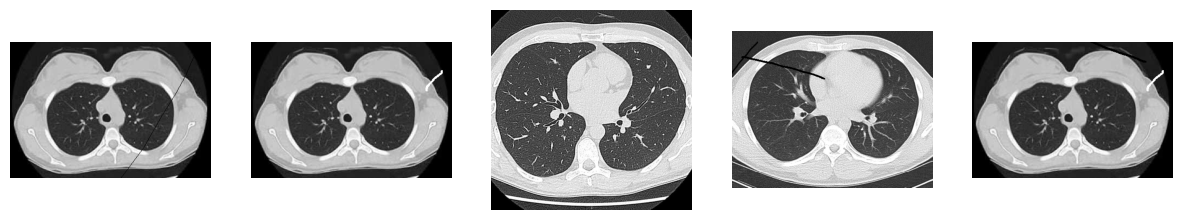

In [65]:
show_images(normal_cases[:5])
plt.show()

In [66]:
target_shape = (128,128)
for i, img in enumerate(normal_cases):
        normal_cases[i] = cv2.resize(img, target_shape, cv2.INTER_AREA)

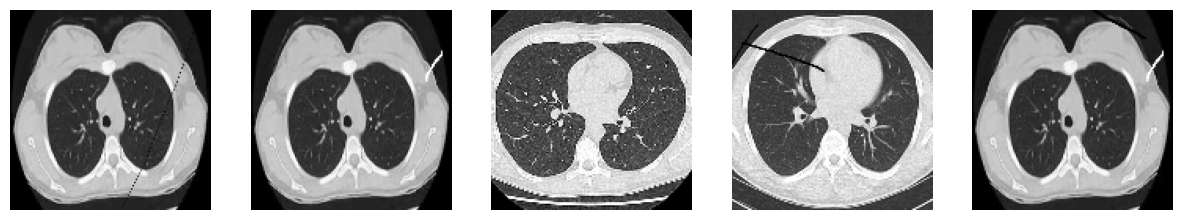

In [67]:
show_images(normal_cases[:5])
plt.show()

In [68]:
normal_cases = np.array(normal_cases)

In [69]:
normal_cases.shape

(54, 128, 128)

In [70]:
# load model 
from tensorflow.keras.models import load_model
model = load_model("./lung_cancer_model.h5")

In [71]:
predict = model.predict(normal_cases)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [72]:
predict = predict.argmax(axis=1)

In [73]:
predict

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

In [74]:
[categories[i] for i in predict]

['Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Mali